# Лабораторная работа №2

ФИО:  Стариков Александр Юрьевич 
Группа: БИВТ-23-СП-3

Отправлять можно следующими способами:
1. Запушить этот ноутбук в GitHub в репозиторий, где у вас лежат ноутбуки с лабами

Deadlines:
- Занятие №6

Что необходимо сделать:  
**В общих чертах просто провести EDA** (но обычно это не бывает просто)
## Читайте задание внимательно

Исходные данные:
1. В [табличке](https://docs.google.com/spreadsheets/d/1NOE0D4JQgD6LbvUqWboUI1TFj4P87ugbqUTDquxlGEI/edit?usp=sharing) необходимо узнать название своего датасета 
2. Скачать нужны вам данные можно в [Google Drive](https://drive.google.com/drive/folders/1sbsjBsJ_ln0XgXCI9R6s17pvyvApgcwF?usp=sharing)
  
---
Теперь по пунктам, что я от вас жду:  
1. **Найти** в таблице (из исходных данных) название своего датасета
2. **Описать** кратко постановку задачи, что от вас хотят. Какие есть переменные. Целевое событие непрерывно (предсказываем число от -$\infty$ до $\infty$) либо дискретно (предсказываем класс из конечного множества вариантов, например 0 или 1, или какое-то число в диапазоне [0; 10])
3. Построить распределение целевой переменной в виде гистограммы, сделать промежуточные выводы (обратите внимание на однородоность распределения и возможный дисбаланс). Посчитайте количество уникальных значений целевой переменной.
4. Выведите основные статистики по переменным в датасете (для этого есть готовый метод в pandas, он считает count, min, max, mean, 25%, 50% и пр.). Это делается **одним** методом (вы его знаете).
5. Выведите основную информацию по датасету (сколько всего колонок, каких они типов, сколько в них non-null элементов). Это делается **одним** методом (вы его знаете).
6. Посчитайте количество пропусков (NaN, Null, null, None) элементов во всех колонках. Предположите, почему эти пропуски могли возникнуть, и как их можно было бы заменить. 
7. Постройте гистограммы 5 любых признаков (из множества `X`, или как оно изначально у нас называется `data.data`). Если видите какое-то смещение, несимметричность и прочее, опишите это словами в ноутбуке.
8. Постройте графики зависимости 5 любых (на ваш выбор) переменных от целевой переменной (если переменных меньше, чем 5, то сделайте столько, сколько получится). Сделайте вывод, можно ли использовать эти переменные для прогнозирования целевой переменной (иначе говоря, есть ли какая-то взаимосвязь между y-переменной и X-переменной)  
9. _extra_ (необязательно). Посмотрите на зависимость двух переменных одновременно от целевой переменной. То есть по оси OX должна быть переменная $X_{n}$, по оси OY -- переменная $X_{k}$. И у вас будет две кривые (два облака точек) в разрезе целевой переменной. Либо вы можете построить похожее для категориальных признаков, но необходимо будет прочитать про heatmap. 

---
P.S.  
Просьба -- делать каждое задание в отдельных ячейках и с отдельными заголовками (как пункт 1 и 2 в этом ноутбуке) типа  
- Заголовок
- Ячейки с кодом
- Другой заголовок
- Другие ячейки с кодом

## 0. Пример импорта данных

In [1]:
import os
import pandas as pd

# Путь к датасету (файл exams.csv лежит в папке LAB2/data)
path_to_dataset = os.path.join("..", "data", "exams.csv")

data = pd.read_csv(path_to_dataset)
print("Размер датасета:", data.shape)
data.head()

Размер датасета: (1000, 8)


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,male,group A,high school,standard,completed,67,67,63
1,female,group D,some high school,free/reduced,none,40,59,55
2,male,group E,some college,free/reduced,none,59,60,50
3,male,group B,high school,standard,none,77,78,68
4,male,group E,associate's degree,standard,completed,78,73,68


## 2. Описание постановки задачи


### Описание постановки задачи

В датасете собрана информация об успеваемости школьников по трём предметам: математике, чтению и письму, а также несколько социально‑демографических признаков (пол, группа, уровень образования родителей, тип обеда и подготовительные курсы).

В рамках этой лабораторной работы будем считать **целевой переменной** балл по математике (`math score`).  
Нас будет интересовать:

- как в целом распределены оценки по математике;
- есть ли выбросы и «хвосты» в распределении;
- как связаны оценки по математике с другими признаками: полом, группой, уровнем образования родителей, типом обеда и прохождением подготовительных курсов;
- как между собой связаны три оценки (по математике, чтению и письму).

Задача EDA — аккуратно посмотреть на данные, найти базовые закономерности и возможные проблемы (пропуски, выбросы и т.п.), чтобы в дальнейшем можно было строить более сложные модели.


## 3. Распределение целевой переменной

Целевая переменная: math score
Количество уникальных значений: 77

count    1000.000000
mean       66.396000
std        15.402871
min        13.000000
25%        56.000000
50%        66.500000
75%        77.000000
max       100.000000
Name: math score, dtype: float64


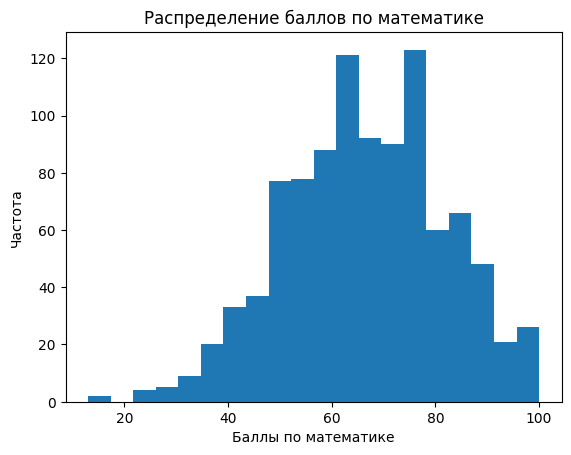

In [2]:

import matplotlib.pyplot as plt

target_col = "math score"

print("Целевая переменная:", target_col)
print("Количество уникальных значений:", data[target_col].nunique())
print()
print(data[target_col].describe())

plt.figure()
plt.hist(data[target_col], bins=20)
plt.title("Распределение баллов по математике")
plt.xlabel("Баллы по математике")
plt.ylabel("Частота")
plt.show()


## 4. Основные статистики по переменным

In [4]:

# Числовые признаки
print("Числовые признаки:")
display(data.describe())

# Категориальные признаки
print("\nКатегориальные признаки:")
display(data.describe(include="object"))


Числовые признаки:


,math score,reading score,writing score
count,1000.000000,1000.000000,1000.000000
mean,66.396000,69.002000,67.738000
std,15.402871,14.737272,15.600985
min,13.000000,27.000000,23.000000
25%,56.000000,60.000000,58.000000
50%,66.500000,70.000000,68.000000
75%,77.000000,79.000000,79.000000
max,100.000000,100.000000,100.000000



Категориальные признаки:


,gender,race/ethnicity,parental level of education,lunch,test preparation course
count,1000,1000,1000,1000,1000
unique,2,5,6,2,2
top,male,group C,some college,standard,none
freq,517,323,222,652,665


## 5. Основная информация по датасету

In [5]:

# Общая информация: типы данных, количество непустых значений и т.д.
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


## 6. Пропуски в данных

In [6]:

missing_counts = data.isna().sum()
print("Количество пропусков по каждому столбцу:")
print(missing_counts)

print("\nКомментарий:")
print("В этом датасете пропусков нет (везде 0).")
print("Но если бы они были, их можно было бы заменить, например:")
print("- для числовых признаков — средним/медианой или предсказанным значением;")
print("- для категориальных признаков — самым частым значением или отдельной категорией 'unknown'.")


Количество пропусков по каждому столбцу:
gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

Комментарий:
В этом датасете пропусков нет (везде 0).
Но если бы они были, их можно было бы заменить, например:
- для числовых признаков — средним/медианой или предсказанным значением;
- для категориальных признаков — самым частым значением или отдельной категорией 'unknown'.


## 7. Гистограммы нескольких признаков

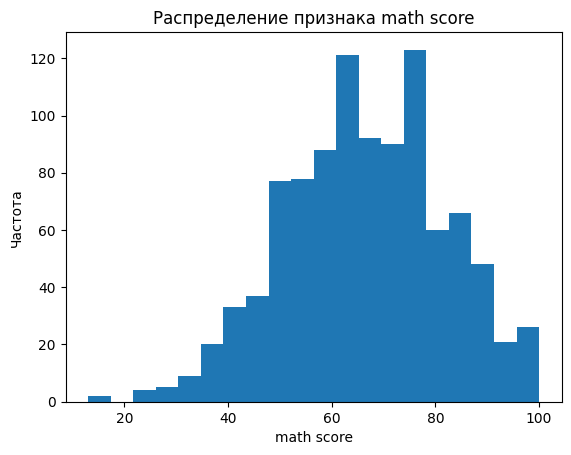

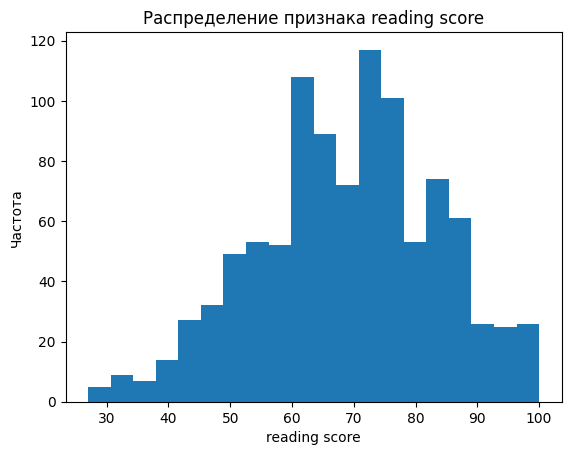

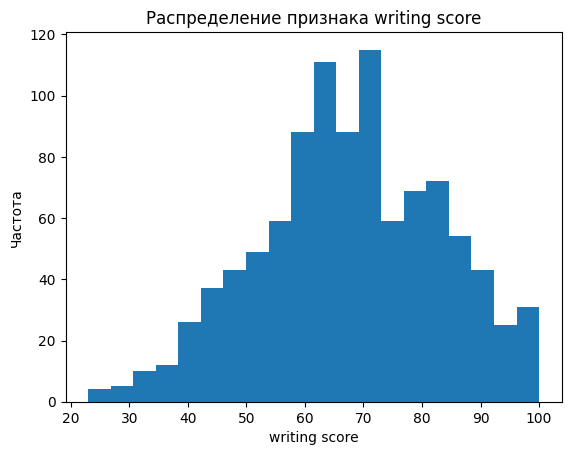

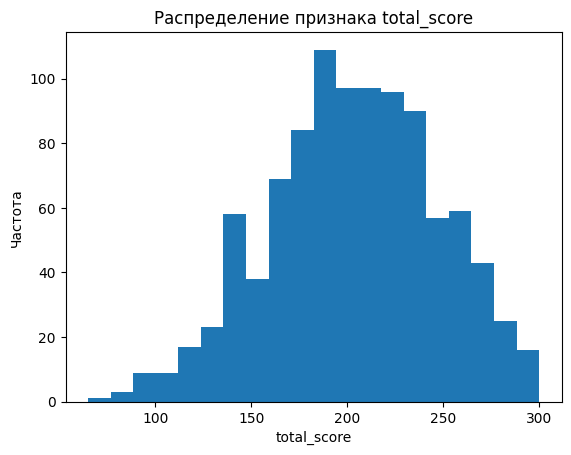

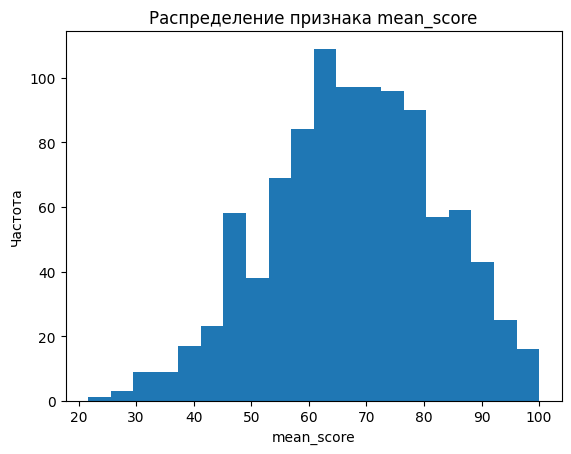

Наблюдения:
- Все распределения сосредоточены около средних значений, крайние значения встречаются реже.
- Для total_score и mean_score форма распределения похожа на распределения отдельных предметов,
  что логично: они являются их суммой и средним.


In [7]:

# Создадим дополнительные числовые признаки
data["total_score"] = data["math score"] + data["reading score"] + data["writing score"]
data["mean_score"] = data["total_score"] / 3

numeric_cols = ["math score", "reading score", "writing score", "total_score", "mean_score"]

for col in numeric_cols:
    plt.figure()
    plt.hist(data[col], bins=20)
    plt.title(f"Распределение признака {col}")
    plt.xlabel(col)
    plt.ylabel("Частота")
    plt.show()

print("Наблюдения:")
print("- Все распределения сосредоточены около средних значений, крайние значения встречаются реже.")
print("- Для total_score и mean_score форма распределения похожа на распределения отдельных предметов,")
print("  что логично: они являются их суммой и средним.")


## 8. Зависимости между целевой переменной и другими признаками

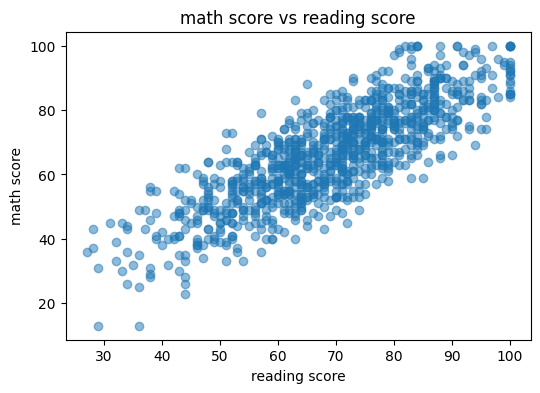

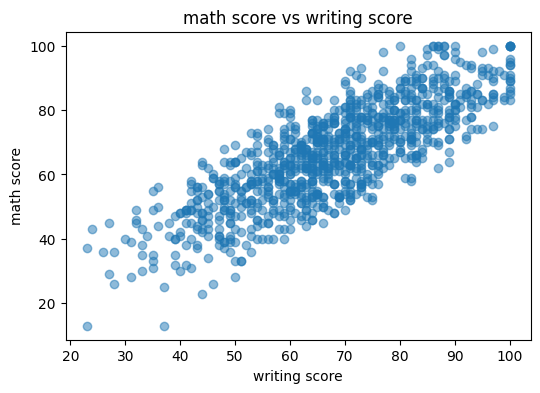

<Figure size 600x400 with 0 Axes>

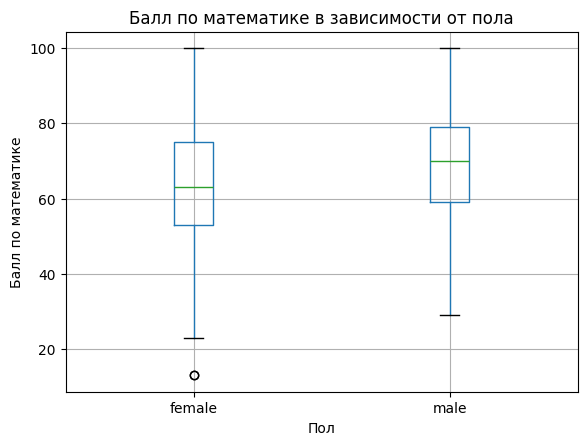

<Figure size 600x400 with 0 Axes>

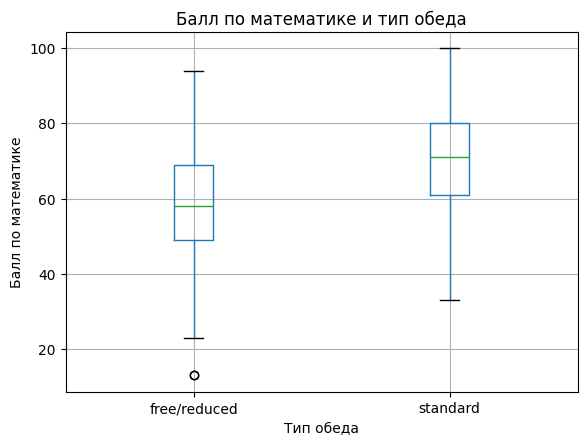

<Figure size 600x400 with 0 Axes>

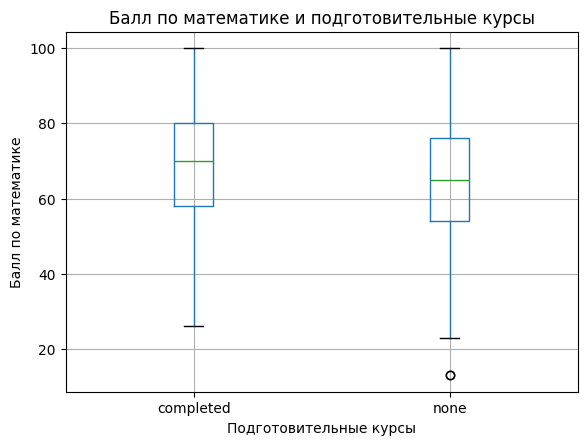

Наблюдения:
- Между math score и другими оценками (reading, writing) видна явная положительная связь:
  чем выше одна оценка, тем выше, как правило, и другая.
- По boxplot'ам видно, что прохождение подготовительных курсов обычно связано с более высокими
  баллами по математике; тип обеда и пол также могут давать небольшую разницу в результатах.


In [8]:

target_col = "math score"
y = data[target_col]

# 1–2. Зависимость от других оценок (scatter)
plt.figure(figsize=(6, 4))
plt.scatter(data["reading score"], y, alpha=0.5)
plt.title(f"{target_col} vs reading score")
plt.xlabel("reading score")
plt.ylabel(target_col)
plt.show()

plt.figure(figsize=(6, 4))
plt.scatter(data["writing score"], y, alpha=0.5)
plt.title(f"{target_col} vs writing score")
plt.xlabel("writing score")
plt.ylabel(target_col)
plt.show()

# 3–5. Зависимость от категориальных признаков (boxplot)
plt.figure(figsize=(6, 4))
data.boxplot(column=target_col, by="gender")
plt.title("Балл по математике в зависимости от пола")
plt.suptitle("")
plt.xlabel("Пол")
plt.ylabel("Балл по математике")
plt.show()

plt.figure(figsize=(6, 4))
data.boxplot(column=target_col, by="lunch")
plt.title("Балл по математике и тип обеда")
plt.suptitle("")
plt.xlabel("Тип обеда")
plt.ylabel("Балл по математике")
plt.show()

plt.figure(figsize=(6, 4))
data.boxplot(column=target_col, by="test preparation course")
plt.title("Балл по математике и подготовительные курсы")
plt.suptitle("")
plt.xlabel("Подготовительные курсы")
plt.ylabel("Балл по математике")
plt.show()

print("Наблюдения:")
print("- Между math score и другими оценками (reading, writing) видна явная положительная связь:")
print("  чем выше одна оценка, тем выше, как правило, и другая.")
print("- По boxplot'ам видно, что прохождение подготовительных курсов обычно связано с более высокими")
print("  баллами по математике; тип обеда и пол также могут давать небольшую разницу в результатах.")
